In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas

均方误差

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [4]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
y2 = np.array([0.6,0.05,0.1,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
mean_squared_error(y,t),mean_squared_error(y2,t)


(0.09750000000000003, 0.5975)

交叉熵误差

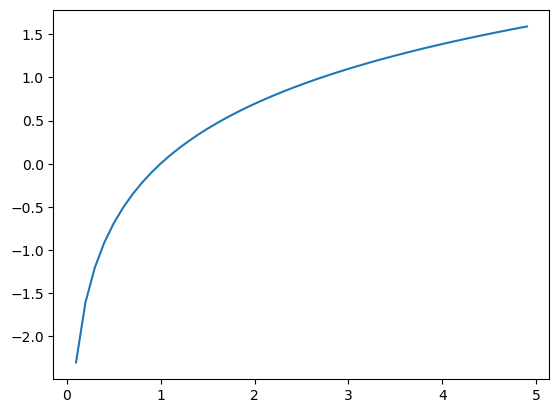

In [11]:
x = np.arange(0.1,5,0.1)
y = np.log(x)
plt.plot(x,y)
plt.show()

In [13]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [14]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
y2 = np.array([0.6,0.05,0.1,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
cross_entropy_error(y,t),cross_entropy_error(y2,t)

(0.510825457099338, 2.302584092994546)

Mini-batch

In [16]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
import numpy as np
import os.path
import gzip
import urllib.request

dataset_path = os.path.dirname(os.path.abspath('exercise.ipynb'))
save_file = os.path.join(dataset_path,'mnist.pkl')

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

train_num = 60000
test_num = 10000
img_size = 784
img_dim = (1,28,28)


def downloadfile(file_name):
    file_path = os.path.join(dataset_path,file_name)

    if os.path.exists(file_path):
        return
    print('Downloading '+file_name)
    urllib.request.urlretrieve(url_base+file_name,file_path)
    print('Done')

def downloadmnist():
    for v in key_file.values():
        downloadfile(v)

def load_img(file_name):
    file_path = os.path.join(dataset_path,file_name)
    print('converting '+file_name+" to numpy array")
    with gzip.open(file_path,"rb") as f:
        data = np.frombuffer(f.read(),np.uint8,offset=16)
    
    data = data.reshape(-1,img_size)
    print('done')

    return data

def load_label(file_name):
    file_path = os.path.join(dataset_path,file_name)
    print('converting '+file_name+'to numpy array')
    with gzip.open(file_path,'rb') as f:
        labels = np.frombuffer(f.read(),np.uint8,offset=8)
    print('Done')

    return labels

def convert_numpy():
    dataset = {}
    dataset['train_img'] = load_img(key_file['train_img'])
    dataset['train_label'] = load_label(key_file['train_label'])
    dataset['test_img'] = load_img(key_file['test_img'])
    dataset['test_label'] = load_label(key_file['test_label'])

    return dataset

def init_mnist():
    downloadmnist()
    dataset = convert_numpy()
    print('creating pickle file')
    with open(save_file,'wb') as f:
        pickle.dump(dataset,f,-1)
    print('done')

def change_one_hot(x):
    t = np.zeros((x.size,10))
    for idx,row in enumerate(t):
        row[x[idx]] = 1
    return t


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下,标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        for key in ('train_label', 'test_label'):
            dataset[key] = change_one_hot(dataset[key])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    
    return  dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']


def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    maxn = np.max(x)
    exp_a = np.exp(x-maxn)
    sum = np.sum(exp_a)
    y = exp_a/sum

    return y

def get_data():
    x_train,t_train,x_test,t_test = load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test

def init_network():
    with open('D:\deeplearningfromScratch\mycode\chapter3\sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    w1,w2,w3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    z1 = sigmoid(np.dot(x,w1)+b1)
    z2 = sigmoid(np.dot(z1,w2)+b2)
    y = softmax(np.dot(z2,w3)+b3)
    return y


In [17]:
x_train,t_train,x_test,t_test = load_mnist(normalize=True,flatten=True,one_hot_label=True)

Done
Done
Done
Done
converting train-images-idx3-ubyte.gz to numpy array
done
converting train-labels-idx1-ubyte.gzto numpy array
Done
converting t10k-images-idx3-ubyte.gz to numpy array
done
converting t10k-labels-idx1-ubyte.gzto numpy array
Done
creating pickle file
done


In [30]:
x_train.shape,t_train.shape,t_train[0]
x_train.ndim

2

np.random.choice(6000,10)会从0-5999之间随机选择10个数字

In [23]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [38]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)

    batch_size = y.shape[0]

    return -np.sum(t*np.log(y+1e-7))/batch_size

cross_entropy_error(y,t),cross_entropy_error(y2,t)


(0.510825457099338, 2.302584092994546)

In [54]:
x_train,t_train,x_test,t_test = load_mnist(normalize=True,flatten=True,one_hot_label=False)
change_t = t_test.reshape(1,t_test.size)
t_test.shape,t_test.size,t_test[0],t_test.ndim,change_t.ndim,change_t[0],change_t[0].size,change_t

((10000,),
 10000,
 7,
 1,
 2,
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 10000,
 array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8))

In [78]:
test_size = x_test.shape[0]
ex_batch_mask = np.random.choice(test_size,batch_size)
ex_batch = x_test[ex_batch_mask]
et_batch = t_test[ex_batch_mask]
ex_batch[np.arange(batch_size),et_batch]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [67]:
def cross_entropy_error_notonehot(y,t):
    if y.ndim == 1:
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)

    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-10))/batch_size

In [82]:
type(et_batch)

numpy.ndarray

In [87]:
t = np.array([2])
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
cross_entropy_error_notonehot(y,t)


0.510825623599324

In [88]:
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h)-f(x))/h

In [89]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [90]:
def f1(x):
    return 0.01*x**2+0.1*x

In [93]:
numerical_diff(f1,5),numerical_diff(f1,10)

(0.1999999999990898, 0.2999999999986347)

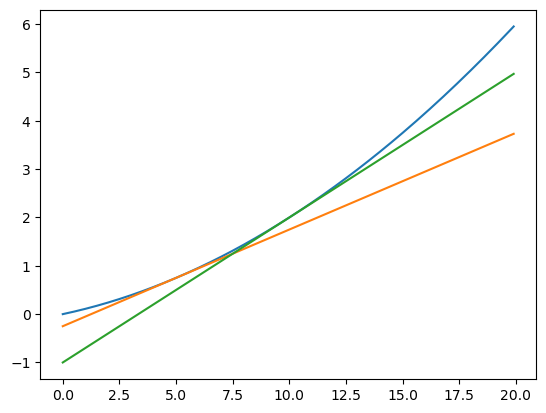

In [105]:
x = np.arange(0,20,0.1)
y = f1(x)
k1 = numerical_diff(f1,5)
b1 = f1(5)-k1*5
y1 = k1*x + b1
k2 = numerical_diff(f1,10)
b2 = f1(10)-k2*10
y2 = k2*x + b2
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [113]:
def f2(x):
    return x[0]**2+x[1]**2

x1 = np.arange(-2,2.5,0.25)
x2 = np.arange(-2,2.5,0.25)
x3 = np.row_stack((x1,x2))



In [115]:
def f2_1(x0):
    return x0**2+4**2

def f2_2(x1):
    return 3**2+x1**2

numerical_diff(f2_1,3),numerical_diff(f2_2,4)

(6.00000000000378, 7.999999999999119)

In [145]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        temp = x[idx]
        x[idx] = temp+h
        fxh1 = f2(x)

        x[idx] = temp-h
        fxh2 = f2(x)

        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = temp

    return grad



In [146]:
numerical_gradient(f2,np.array([3.0,4.0])),numerical_gradient(f2,np.array([0.0,2.0])),numerical_gradient(f2,np.array([3.0,0.0]))

(array([6., 8.]), array([0., 4.]), array([6., 0.]))

In [147]:
def gradient_descent(f,init_x,lr,step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f2,x)
        x -= lr*grad
    return x

In [154]:
init_x = np.array([-3.0,4.0])
gradient_descent(f2,init_x=init_x,lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [170]:
gradient_descent(f2,init_x=init_x,lr=10000)

array([ 1.95510224e+12, -2.60686966e+12])